#Image classification of Different Building Types

#Changes and summary

I made some reasearch and came acroos a few things as to why the previous model from the week4 notebook  wasn't performing well and made some change below is a summary of changes made to effect this change:


1.  introducing  Stopping the model early to aviod over fitting
2.   Adding more con2d layers and increased the number of filters .
3. Using dropout to prevent over memorizing
4. Reducing the learning rate
5. Added data augumentation (given the limited number of data we have)





Task: To build a model that classifies Buildings using tensorflow and PyTorch following instructions from a previous notebook

##1)TensorFlow


In [13]:
# imorting necessary libraries/Dependencies
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

##Resizing the images to reduce the size for the model to work

In [16]:
IMAGE_HEIGHT = 400 # The height the image is to be resized to
IMAGE_WIDTH = 300 # The width the image is to be resized to
BATCH_SIZE = 32

# Define paths for data
data_dir = '/content/drive/MyDrive/Colab Notebooks/Building Types/Building Types' # Ensure the name of the folder is set to this.
class_names = ['Bungalow', 'Highrise', 'Storey-Building']


In [17]:

# Set up data generators for training and testing
datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0,1]
    validation_split=0.2 ,      # 20% of data will be used for validation
    rotation_range=30,  # Rotate images randomly
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 959 images belonging to 3 classes.
Found 238 images belonging to 3 classes.


##Model Architecture

In [22]:
# Define the model architecture
#Added one more convulation layer and increased the filter
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),#increasing the number of filters from 16 = 32
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Added the dropout feature to reduce the overfiiting
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5), #Also added the dropout to 50%
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for building types
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 398, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 199, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 197, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 98, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 96, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 48, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 107520)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      27,525,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,582,467 (105.22 MB)

 Trainable params: 27,582,467 (105.22 MB)

 Non-trainable params: 0 (0.00 B)

##Training the model

In [20]:


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 372s 12s/step - accuracy: 0.4373 - loss: 1.1562 - val_accuracy: 0.5084 - val_loss: 0.9849
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 351s 11s/step - accuracy: 0.5512 - loss: 0.8653 - val_accuracy: 0.4580 - val_loss: 0.8743
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 383s 11s/step - accuracy: 0.5735 - loss: 0.8300 - val_accuracy: 0.5504 - val_loss: 0.8330
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 349s 11s/step - accuracy: 0.6034 - loss: 0.7897 - val_accuracy: 0.4748 - val_loss: 0.8887
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 381s 11s/step - accuracy: 0.5775 - loss: 0.8243 - val_accuracy: 0.5840 - val_loss: 0.8063
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 361s 12s/step - accuracy: 0.6071 - loss: 0.7726 - val_accuracy: 0.5798 - val_loss: 0.7657
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 336s 11s/step - accuracy: 0.6465 - loss: 0.7412 - val_accuracy: 0.5630 - val_loss: 0.8177
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 397s 11s/step - accuracy: 0.6157 - loss: 0.7525 - val_accuracy: 0.6639 - val_

## Evaluating the model

In [21]:

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print(f'Test accuracy: {test_acc*100:.2f}%')

8/8 - 49s - 6s/step - accuracy: 0.6050 - loss: 0.8104
Test accuracy: 60.50%


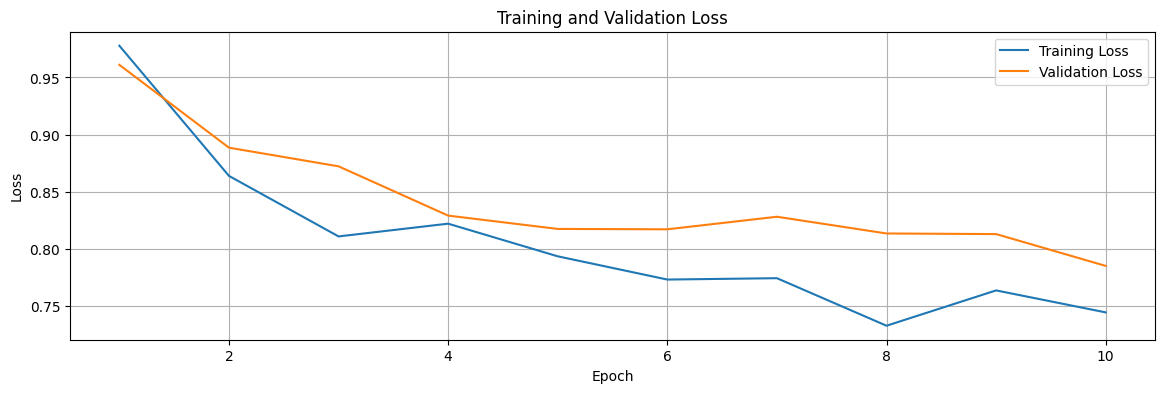

In [121]:

results = history.history
train_loss = results["loss"]
val_loss = results["val_loss"]

epochs_range = range(1, len(train_loss) + 1)  # Adjusting this to match the number of epochs actually run

plt.figure(figsize=(14,4))
plt.grid(True)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc="upper right")
plt.show()

## Confusion matric to further visualize the performance of the model

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step
                 precision    recall  f1-score   support

       Bungalow       0.38      0.36      0.37        81
      High-rise       0.09      0.09      0.09        33
Storey-building       0.57      0.59      0.58       124

       accuracy                           0.44       238
      macro avg       0.35      0.35      0.35       238
   weighted avg       0.44      0.44      0.44       238



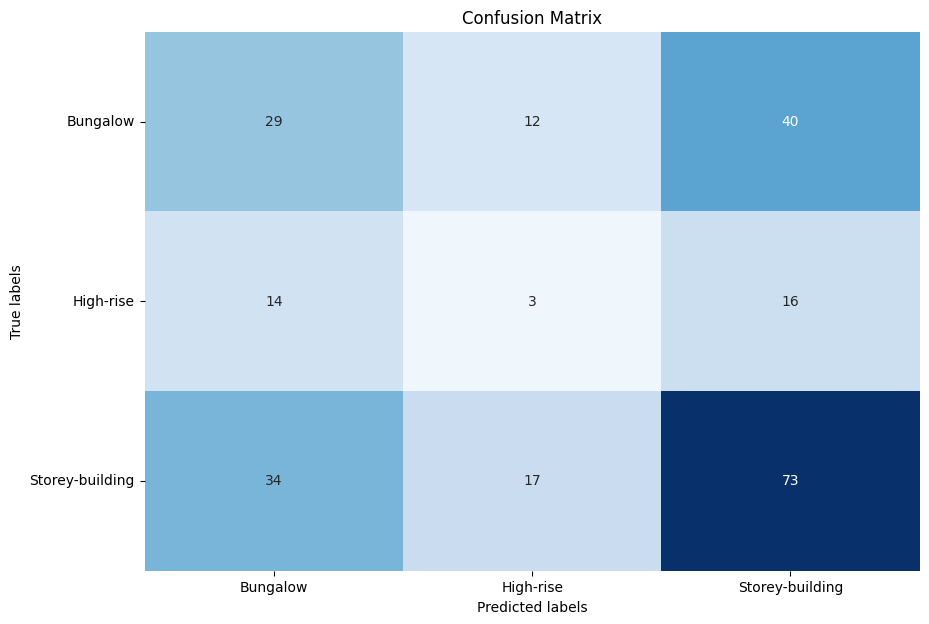

In [91]:

predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
validation_generator.reset()
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())


# Creating the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Optionally, you can print a classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))



plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)
plt.show()

#Part 2: PyTorch

i was having alot of issuses with this part given the fact that it seems i've used up the GPU runtime on google colab 😞 so testing was an issuse but i still made research  on how to use pytorch to solve this classification problem

In [6]:
# import all necessary packages
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import TensorDataset, DataLoader

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

##Loading the data and adding the data augumentaion

In [7]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((400, 300)),       # Resize images to 400x300
    transforms.RandomHorizontalFlip(),   # Data augmentation
    transforms.RandomRotation(10),       # Random rotation
    transforms.ToTensor(),               # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Load the dataset from the directory
data_dir = '/content/drive/MyDrive/Colab Notebooks/Building Types/Building Types'
full_dataset = datasets.ImageFolder(data_dir, transform=transform)

# Splitting the dataset into train and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# DataLoader setup
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [8]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # First convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),       # Max pooling
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # Second convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),       # Max pooling
            nn.Conv2d(64, 64, kernel_size=3, padding=1), # Third convolutional layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)        # Max pooling
        )
        self.fc_layer = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(64 * 50 * 37, 256),                # Fully connected layer
            nn.ReLU(),
            nn.Linear(256, 3)                            # Output layer
        )

    def forward(self, x):
        x = self.conv_layer(x)  # Apply convolutional layers
        x = torch.flatten(x, 1) # Flatten the output for the dense layer
        x = self.fc_layer(x)    # Apply fully connected layers
        return x

# Create model instance
model = CNN()


#Training the model

In [ ]:
import torch.optim as optim

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00018)

# Training the model
def train_model(num_epochs, train_loader, val_loader):
    for epoch in range(num_epochs):
        model.train()
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validation accuracy
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in val_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Acc: {100 * correct / total:.2f}%')

train_model(10, train_loader, val_loader)


Epoch [1/10], Loss: 0.6555, Validation Acc: 62.50%
Epoch [2/10], Loss: 0.6418, Validation Acc: 60.42%
Epoch [3/10], Loss: 0.8029, Validation Acc: 65.00%
Epoch [4/10], Loss: 0.6137, Validation Acc: 66.25%


#Evaluating the model

In [10]:
def evaluate_model(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    correct = 0
    total = 0
    criterion = nn.CrossEntropyLoss()  # Assuming using CrossEntropyLoss for a classification task
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

# Use the function to evaluate the model
test_loss, test_acc = evaluate_model(model, val_loader)
print(f'Test accuracy: {test_acc*100:.2f}%')


Test accuracy: 69.58%


#Note/Findings

i realised that the pytourch perform better using the same augumentation  and others